SystemExit: 0

C:\Users\baito\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2971: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


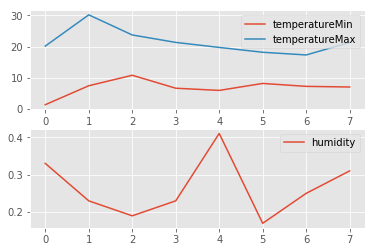

In [1]:
# This is the main code, you can get next-week-weather of Hefei.

import sys
import cv2 as cv
import numpy as np
from PyQt5.QtGui import QImage, QPixmap
from PyQt5.QtWidgets import (QApplication, QDialog, QFileDialog, QGridLayout,QLabel, QPushButton)
import json
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline

class win(QDialog):
    def __init__(self):

        # 初始化一个img的ndarray, 用于存储图像
        self.img = np.ndarray(())

        super().__init__()
        self.initUI()

    def initUI(self):
        self.resize(450,300)
        self.btnNextweek = QPushButton('weather_nextweek', self)
        self.btnQuit = QPushButton('Quit', self)
        self.label = QLabel()

        # 布局设定
        layout = QGridLayout(self)
        layout.addWidget(self.label, 0, 1, 1, 2)
        layout.addWidget(self.btnNextweek, 2, 1, 1, 1)
        layout.addWidget(self.btnQuit, 2, 2, 1, 1)

        # 信号与槽连接, PyQt5与Qt5相同, 信号可绑定普通成员函数
        self.btnNextweek.clicked.connect(self.nextweekSlot)
        self.btnQuit.clicked.connect(self.close)

        
    def nextweekSlot(self):

        # 采用opencv函数读取数据
        self.img = cv.imread("weather_nextweek.png", 1)

        if self.img.size == 1:
            return

        self.refreshShow()

    def refreshShow(self):
        # 提取图像的尺寸和通道, 用于将opencv下的image转换成Qimage
        height, width, channel = self.img.shape
        bytesPerLine = 3 * width
        self.qImg = QImage(self.img.data, width, height, bytesPerLine,
                           QImage.Format_RGB888).rgbSwapped()

        # 将Qimage显示出来
        self.label.setPixmap(QPixmap.fromImage(self.qImg))


if __name__ == '__main__':
    
    # get weather fig next week
    from weather import next_week_weather
    next_week_weather()
    
    a = QApplication(sys.argv)
    w = win()
    w.show()
    sys.exit(a.exec_())